In [26]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
import numpy as np

In [27]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [28]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Masrafe/Coding/Git_Hub_code/ml_project/road_damage/pothole_detection_CNN-main/Dataset',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1530 files belonging to 3 classes.


In [29]:
class_names = dataset.class_names
class_names

['Crack', 'Pothole', 'Surface Erosion']

In [30]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 2 2 2 1 0 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 1 2 2 0 2 2 2 2 0]


In [31]:
len(dataset)

48

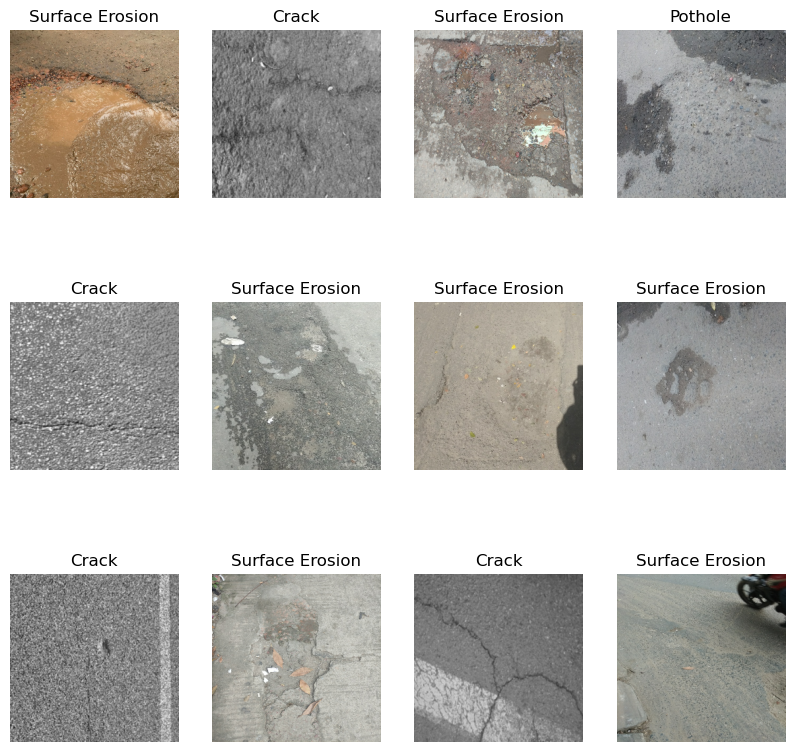

In [32]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)  
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [33]:
train_size = 0.8
len(dataset)*train_size

38.400000000000006

In [34]:
train_ds = dataset.take(38)
len(train_ds)

38

In [35]:
test_ds = dataset.skip(38)
len(test_ds)

10

In [36]:
val_size=0.1
len(dataset)*val_size

4.800000000000001

In [37]:
val_ds = test_ds.take(4)
len(val_ds)

4

In [38]:
test_ds = test_ds.skip(4)
len(test_ds)

6

In [39]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [40]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [41]:
len(train_ds)

38

In [42]:
len(val_ds)

4

In [43]:
len(test_ds)

6

In [44]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [45]:
resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [46]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [47]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model.build(input_shape=input_shape)

d:\Masrafe\Coding\python\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [50]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3967 - loss: 1.0932 - val_accuracy: 0.4590 - val_loss: 1.0852
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4403 - loss: 1.0902 - val_accuracy: 0.4508 - val_loss: 1.0675
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.4882 - loss: 1.0262 - val_accuracy: 0.5902 - val_loss: 0.9162
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5675 - loss: 0.9125 - val_accuracy: 0.6066 - val_loss: 0.8038
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5432 - loss: 0.9081 - val_accuracy: 0.5984 - val_loss: 0.8221
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5370 - loss: 0.8869 - val_accuracy: 0.5738 - val_loss: 0.7887
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 973ms/step - accuracy: 0.5645 - loss: 0.8589 - val_accuracy: 0.6148 - val_loss: 0.7818
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 954ms/step - accuracy: 0.5637 - loss: 0.8738 - val_accuracy: 0.6721 - val

In [51]:
scores = model.evaluate(test_ds)
scores

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.7903 - loss: 0.4981


[0.45577025413513184, 0.8020833134651184]

In [52]:
history

In [53]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 38}

In [54]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [55]:
history.history['accuracy']

[0.41735535860061646,
 0.43305784463882446,
 0.5041322112083435,
 0.5438016653060913,
 0.5545454621315002,
 0.5611570477485657,
 0.5727272629737854,
 0.6107438206672668,
 0.6140496134757996,
 0.6661157011985779,
 0.684297502040863,
 0.6272727251052856,
 0.684297502040863,
 0.6669421195983887,
 0.6793388724327087,
 0.699999988079071,
 0.7099173665046692,
 0.715702474117279,
 0.7239669561386108,
 0.7438016533851624,
 0.7314049601554871,
 0.7454545497894287,
 0.7520661354064941,
 0.7644628286361694,
 0.7347107529640198,
 0.7132231593132019,
 0.7190082669258118,
 0.7760330438613892,
 0.7462809681892395,
 0.7760330438613892,
 0.757851243019104,
 0.7652892470359802,
 0.7644628286361694,
 0.7859504222869873,
 0.7504132390022278,
 0.7743801474571228,
 0.7776859402656555,
 0.784297525882721,
 0.7818182110786438,
 0.7900826334953308,
 0.7942149043083191,
 0.804958701133728,
 0.7909091114997864,
 0.7900826334953308,
 0.8016529083251953,
 0.8041322231292725,
 0.7950413227081299,
 0.810743808746337

In [56]:
(history.history['loss'])

[1.0884499549865723,
 1.0898181200027466,
 0.9958907961845398,
 0.9295651316642761,
 0.8982453346252441,
 0.8677842617034912,
 0.8487582206726074,
 0.8234990239143372,
 0.8068740963935852,
 0.7556576132774353,
 0.7259615063667297,
 0.7737749814987183,
 0.731515109539032,
 0.7296172976493835,
 0.7177516222000122,
 0.6853795051574707,
 0.6748540997505188,
 0.6778247952461243,
 0.6577699184417725,
 0.6432204842567444,
 0.6565372347831726,
 0.6219380497932434,
 0.6030988693237305,
 0.598597526550293,
 0.6114917993545532,
 0.6592682600021362,
 0.6318702101707458,
 0.5643948912620544,
 0.6248699426651001,
 0.5695613026618958,
 0.5923317670822144,
 0.5580199360847473,
 0.5622326135635376,
 0.5090191960334778,
 0.5736400485038757,
 0.5624659061431885,
 0.5319898128509521,
 0.49834853410720825,
 0.5155766606330872,
 0.5124136209487915,
 0.5162612795829773,
 0.4814979135990143,
 0.4963077902793884,
 0.5028390884399414,
 0.483473002910614,
 0.4838789105415344,
 0.4741946756839752,
 0.472492605447

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

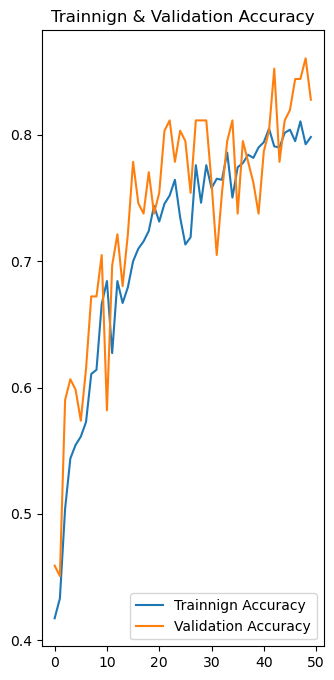

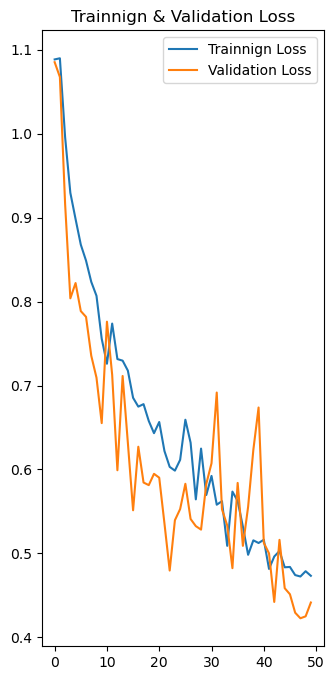

In [58]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label = "Trainnign Accuracy")
plt.plot(range(EPOCHS), val_accuracy, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Trainnign & Validation Accuracy")

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = "Trainnign Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc = 'upper right')
plt.title("Trainnign & Validation Loss")
plt.show()

In [59]:
model.evaluate(train_ds)

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.8228 - loss: 0.4337


[0.42155683040618896, 0.8322314023971558]

First image to predict
First image actual label:  Surface Erosion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
Predicted Label:  Surface Erosion


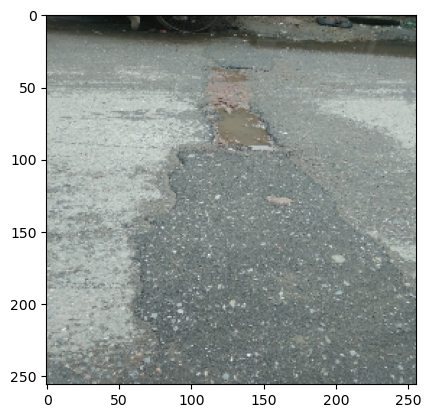

In [60]:
for image_batch, label_batch in test_ds.take(1):
    first_image = (image_batch[0].numpy().astype('uint8'))
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [61]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    prediction = model.predict(img_array)
    
    predicted_calss = class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    
    return predicted_calss, confidence 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
85.58
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
87.77
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
84.48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
57.95
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
68.81
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
78.12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
56.15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
96.43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
99.89


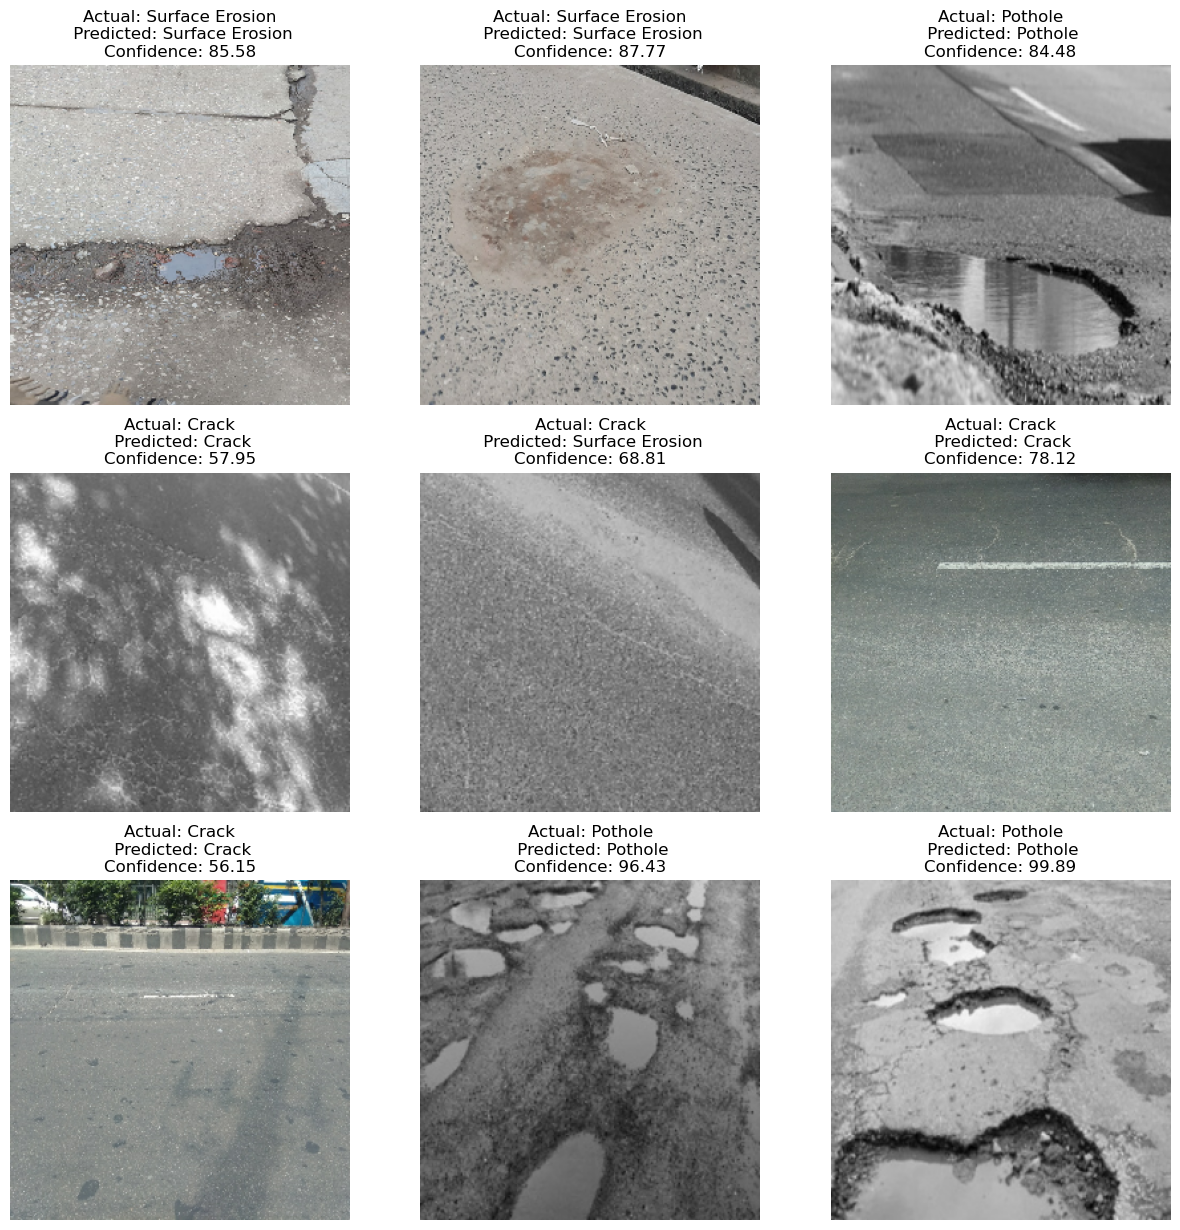

In [62]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, connfidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}\nConfidence: {connfidence}")
        print(connfidence)
        plt.axis("off")

In [63]:
confidence_threshold = 0.8
if connfidence >= confidence_threshold:
    print(f"Prediction: {predicted_class}, Confidence: {connfidence}")
else:
    print("Prediction confidence is too low.")


Prediction: Pothole, Confidence: 99.89


In [64]:
from sklearn.metrics import classification_report, f1_score
#Collect true and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

#Calculate F1 score (macro, weighted, etc.)
print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_true, y_pred, average='weighted'))

#Optional: Full classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
F1 Score (macro): 0.8042898617321982
F1 Score (weighted): 0.8028065547610842

Classification Report:

                 precision    recall  f1-score   support

          Crack       0.82      0.80      0.81        51
        Pothole       0.98      0.69      0.81        61
Surface Erosion       0.72      0.89      0.79        80

       accuracy                           0.80       192
      macro avg       0.84      0.79      0.80       192
   weighted avg       0.83      0.80      0.80       192



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


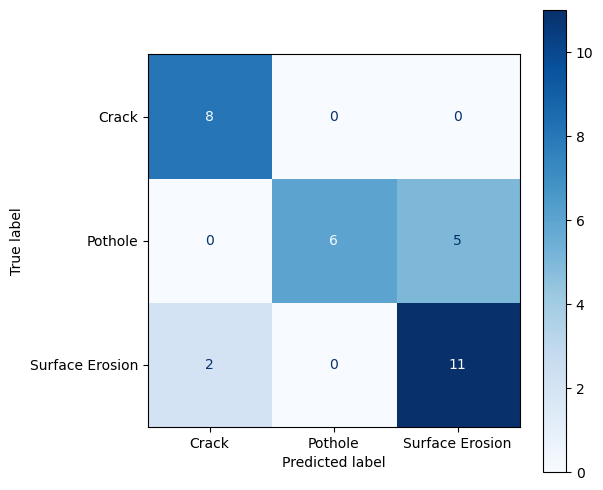

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Step 1: Get true and predicted labels
y_true = []
y_pred = []

#Loop through test dataset
for images, labels in test_ds:
    predictions = model.predict(images)

#If labels are not one-hot encoded
y_true.extend(labels.numpy())
y_pred.extend(np.argmax(predictions, axis=1))

#Step 2: Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

#Optional: If you want custom class names
class_names = ['Crack', 'Pothole', 'Surface Erosion']  # Replace with your actual class names

#Step 3: Plot and save the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size if needed
disp.plot(ax=ax, cmap=plt.cm.Blues)

#Save as image
plt.savefig("confusion_matrix_CNN.png", dpi=300, bbox_inches='tight')
plt.show()